In [1]:
%cd ..


/home/seoyangsam/PycharmProjects/group7-group-assignment-


No handles with labels found to put in legend.


               city  count
0             Aalst      2
1            Aalter      1
2          Aarschot      2
3           Aarsele      1
4    Aiseau-Presles      1
..              ...    ...
449          Zingem      1
450        Zonhoven      1
451        Zottegem      1
452           Zwalm      1
453     Zwijndrecht      1

[454 rows x 2 columns]


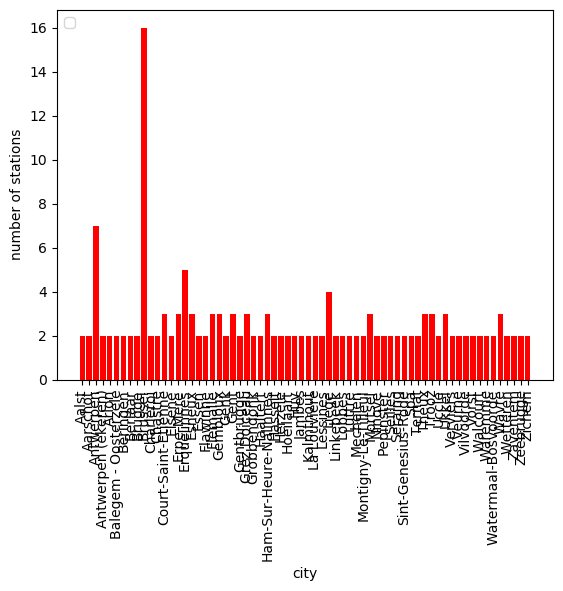

In [19]:
from data_processing import data
import utils as utils
import numpy as np
import pandas as pd
from pandas.api.types import is_datetime64_any_dtype as is_datetime

In [16]:
# import travelers
travelers = pd.read_csv("./Data/Unprocessed/travelers.csv", delimiter=";")

In [20]:
# Impute missing values with 0: because null value indicates no train rides on that day /week
data.travelers['week'].fillna(0, inplace=True)
data.travelers['saturday'].fillna(0, inplace=True)
data.travelers['sunday'].fillna(0, inplace=True)
data.full_trips.columns

Index(['Unnamed: 0', 'Date of departure', 'Train number', 'Relation',
       'Railway operators', 'Railway of departure', 'Time of real arrival',
       'Time of real departure', 'Time of planned arrival',
       'Time of planned departure', 'Direction of relation',
       'Name of the stop', 'Railway of arrival', 'Date of planned arrival',
       'Date of planned departure', 'Date of real arrival',
       'Date of real departure', 'Delay time'],
      dtype='object')

In [21]:
# Standardize name for travelers
data.travelers['Station'] = data.travelers['Station'].str.lower()
data.travelers = data.travelers.replace({"Station": utils.Dict})

In [22]:
data.travelers.head(5)

,Unnamed: 0,Station,week,saturday,sunday,sum
0,0,aalst,6444.0,1768.0,1592.0,9804.0
1,1,aalst-kerrebroek,27.0,0.0,0.0,NaN
2,2,aalter,2288.0,1055.0,855.0,4198.0
3,3,aarschot,6270.0,1954.0,1395.0,9619.0
4,4,aarsele,34.0,0.0,0.0,NaN
